# Sentiment Analyse with Jupyter Notebook The Clinics Review Datas in Lower Saxsony Germany

Sentimentanalyse, auch _Opinion Mining_ genannt, ist das herausfinden der Meinung, die in einem Text zu igendetwas geäußert wird.

Es werden zwei Dimensionen, entlang denen Text klassifiziert werden können, unterschieden: 
 * Objektiv vs. Subjektiv und 
 * Negativ - Neutral - Positiv.

Längere Texte können natürlich mehrere Meinungen zu den gleichen und zu verschiedenen Sachen enthalten.

Unsere einfache Hypothese ist, dass es Wörter gibt, die eine stark positives oder negatives Sentiment verkörpern, und das es reicht diese Wörter zu finden, um einen Text zu klassifizieren. Diese Annahme ist natürlich nicht ganz korrekt. Eine positive ode negative Meinung hängt natürlich von mehr als nur von einzelnen Wörtern ab: insbesondere  Negation kann die Bedeutung eines Wortes grundlegend ändern. Einige ganz neue Verfahren (Stichwörter: ELMO und BERT) können auch mit der unterschiedliche Bedeutung von Wörtern in Abhängigkeit der umgebenden Wörter umgehen. Wir kommen aber schon ganz weit, wenn wir nur einzelne Wörter verwenden. Verfahren, die nur einzelne Wörter verwenden, ohne ihre Beziehungen zu berücksichtigen, nennt man übrigens _Bag of Word_-Verfahren.

Es gibt nun zwei Möglichkeiten die Idee umzusetzen:
1. Wir trainieren einen Classifier, der aus Beispieltexten lernt, wie viel jedes Wort zum positiven oder negativen Sentiment beiträgt. Der Vorteil dieser Methode ist, dass wie genaue gewichte für eine spezifische Domäne oder Textart lernen können. Wir nutzen die Bewertungdaten der Webseite klinikbewertung.de
2. Wir nutzen allgemeine Listen mit positiven und negativen Wörtern.

## Tools

Für die Sentimentanalyse brauchen wir in Grunde genommen nur Listen mit positiven und negativen Wörtern und eine Funktion, die zählt wie viele positive und negative Wörter es in einem Text gibt. Es gibt aber auch Tools, die das alles ganz unkomplziert für uns erledigen können. Für die Sentimentanalyse können wir die Bibiothek _TextBlob_ nutzen.

Das ist jetzt die dritte Bibliothek für NLP. Was sind die Unterschiede?

* NLTK: Eine Sammlung mit sehr vielen Algorithmen, meistens sprachunabhängig oder für viele Sprachen geeignet. Oft auch viele unterschiedliche Algorithmen für dieselbe Aufgabe. Ein Eldorado für Experte, die experimentieren und selber neue Anwendungen entwickeln wollen.
* TextBlob: eine Auswahl von Algorithmen aus NLTK, die zusammen eine Standard-Analyse eines Textes für einige wenige Sprachen ausführen können. Wenig Vorwissn erforderlich, einfach einzusetzen, aber ohne Möglichkeiten, etwas anzupassen.
* Spacy: von der Idee und Funktionalität sehr ähnlich zu TextBlob, etwas umfangreicher und vorallem mit eigener sehr performante Implementierung.

Weder NLTK noch Spacy enthalten eine fertig eingebaute Sentimentanalyse für Deutsche Texte. TextBlob bietet diese Funktionalität aber.  Deswegen in diesem Notebook werden wir Textblob nutezn um die Polarität zu zeigen.

## Textanalyse mit TextBlob
Using TextBlob to calculate sentiment polarity which lies in the range of [-1,1] where 1 means positive sentiment and -1 means a negative sentiment.
Zunächst installieren wir die Deutsche Version von TextBlob:

In [1]:
!pip install -U textblob-de==0.4.3

Requirement already up-to-date: textblob-de==0.4.3 in c:\users\name\anaconda3\lib\site-packages (0.4.3)


In [2]:
!python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\name\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\name\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\name\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\name\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\name\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\name\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [142]:
!python -m pip install wordcloud

In [31]:
!pip install bar_chart_race

In [396]:
!pip3 install xgboost

#### Danach importieren wir die Bibliotekhen, die benötigt werden.

In [383]:
import pandas as pd
import numpy as np
import nltk
import csv
import textblob
from textblob import TextBlob
from textblob_de import TextBlobDE
from textblob_de import PatternParser
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS
from textblob.sentiments import NaiveBayesAnalyzer
import numpy as npy
from PIL import Image
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import bar_chart_race as bcr
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import re
import pickle
import sklearn

from bokeh.io import output_notebook
output_notebook()

from pathlib import Path


pd.options.display.max_columns = 100
pd.options.display.max_rows = 300
pd.options.display.max_colwidth = 100
np.set_printoptions(threshold=2000)

Loading BokehJS ...

In [397]:
#import holoviews as hv
#import hvplot
#from hvplot import pandas
#hv.extension("bokeh")
from xgboost import XGBClassifier


##### Konvertieren csv-Daten in Pandas DataFrame

In [334]:
data = pd.read_csv(r'C:\Users\name\Desktop\WB\Abschlussproject\ML\clinical_data_lowersaxony.csv', encoding='utf-8')

#### Wir erstellen Dataframe

In [335]:
df = pd.DataFrame(data, columns= ['K_ID','Name der Klinik', 'Titel','Datum','Fachbereich','Erfahrungsbericht','Gesamtzufriedenheit','Qualität der Beratung','Mediz. Behandlung','Verwaltung und Abläufe','Ausstattung und Gestaltung'])
df

,K_ID,Name der Klinik,Titel,Datum,Fachbereich,Erfahrungsbericht,Gesamtzufriedenheit,Qualität der Beratung,Mediz. Behandlung,Verwaltung und Abläufe,Ausstattung und Gestaltung
0,1,Augenklinik Dr.Hoffmann,super Klinik,16.03.2021,Augen,Meine Laser OP grauer Star hat super geklappt....,sehr zufrieden,sehr zufrieden,sehr zufrieden,zufrieden,zufrieden
1,1,Augenklinik Dr.Hoffmann,Ich war sehr zufrieden mit allem,20.01.2021,Augen,Bin sehr zufrieden gewesen mit der Klinik und ...,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden
2,1,Augenklinik Dr.Hoffmann,Endlich wieder klare Sicht,16.11.2020,Augen,Komptentes Ãrzteteam.\nStrickte Einhaltung de...,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden
3,1,Augenklinik Dr.Hoffmann,Beste Augenklinik,22.03.2020,Augen,Ich komme seit einen halben Jahr mit meiner be...,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden
4,1,Augenklinik Dr.Hoffmann,ich war ringsherum zufrieden,14.11.2019,Augen,Ich war Anfang November 2019 zur Augen-OP (Gra...,sehr zufrieden,sehr zufrieden,sehr zufrieden,zufrieden,sehr zufrieden
...,...,...,...,...,...,...,...,...,...,...,...
2842,22,Kreiskrankenhaus Osterholz,Super KH.,08.12.2009,Entbindung,"So ein nettes, zuvorkommendes, aufmerksames, h...",sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,zufrieden
2843,22,Kreiskrankenhaus Osterholz,note 6,23.11.2009,Handchirurgie,also ich muss wirklich sagen ich mag das krank...,unzufrieden,unzufrieden,unzufrieden,unzufrieden,sehr zufrieden
2844,22,Kreiskrankenhaus Osterholz,macht so weiter,04.07.2009,Chirurgie,ich habe im osterholzer kreiskrankenhaus im ja...,sehr zufrieden,sehr zufrieden,sehr zufrieden,zufrieden,zufrieden
2845,22,Kreiskrankenhaus Osterholz,Alles Super,24.01.2009,Frauen,Ich habe meinen Sohn am 2.1.2009 Entbunden.All...,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden


In [336]:
df.dtypes

K_ID                           int64
Name der Klinik               object
Titel                         object
Datum                         object
Fachbereich                   object
Erfahrungsbericht             object
Gesamtzufriedenheit           object
Qualität der Beratung         object
Mediz. Behandlung             object
Verwaltung und Abläufe        object
Ausstattung und Gestaltung    object
dtype: object

In [337]:
df.info

<bound method DataFrame.info of       K_ID             Name der Klinik                             Titel  \
0        1     Augenklinik Dr.Hoffmann                      super Klinik   
1        1     Augenklinik Dr.Hoffmann  Ich war sehr zufrieden mit allem   
2        1     Augenklinik Dr.Hoffmann        Endlich wieder klare Sicht   
3        1     Augenklinik Dr.Hoffmann                 Beste Augenklinik   
4        1     Augenklinik Dr.Hoffmann      ich war ringsherum zufrieden   
...    ...                         ...                               ...   
2842    22  Kreiskrankenhaus Osterholz                         Super KH.   
2843    22  Kreiskrankenhaus Osterholz                            note 6   
2844    22  Kreiskrankenhaus Osterholz                   macht so weiter   
2845    22  Kreiskrankenhaus Osterholz                       Alles Super   
2846    22  Kreiskrankenhaus Osterholz                      DankeschÃ¶n!   

           Datum    Fachbereich  \
0     16.03.2021    

## Preproccessing and Data Preparation

Obwohl wir die Daten als UTF-8 kodiert haben, sollen wir einige Falsche Wörter ändern.

In [338]:
def preprocess(ReviewText):
    ReviewText= ReviewText.str.replace('\n','')
    ReviewText= ReviewText.str.replace('Ã¶','ö')
    ReviewText= ReviewText.str.replace('Ã\x84','Ä')
    ReviewText= ReviewText.str.replace('Ã¤','ä')
    ReviewText= ReviewText.str.replace('Ã¼','ü')
    ReviewText= ReviewText.str.replace('Ã\x9f','ß')
    ReviewText= ReviewText.str.replace('Ã\x9c','Ü')
    return ReviewText
df.Erfahrungsbericht = preprocess(df.Erfahrungsbericht)
df['Titel'] = preprocess(df['Titel'])

In [342]:
df['Gesamtzufriedenheit']=df['Gesamtzufriedenheit'].str.replace(r"\(.*\)","")
df['Qualität der Beratung']=df['Qualität der Beratung'].str.replace(r"\(.*\)","")
df['Mediz. Behandlung']=df['Mediz. Behandlung'].str.replace(r"\(.*\)","")
df['Verwaltung und Abläufe']=df['Verwaltung und Abläufe'].str.replace(r"\(.*\)","")
df['Ausstattung und Gestaltung']=df['Ausstattung und Gestaltung'].str.replace(r"\(.*\)","")


In [343]:
df

,K_ID,Name der Klinik,Titel,Datum,Fachbereich,Erfahrungsbericht,Gesamtzufriedenheit,Qualität der Beratung,Mediz. Behandlung,Verwaltung und Abläufe,Ausstattung und Gestaltung
0,1,Augenklinik Dr.Hoffmann,super Klinik,16.03.2021,Augen,Meine Laser OP grauer Star hat super geklappt....,sehr zufrieden,sehr zufrieden,sehr zufrieden,zufrieden,zufrieden
1,1,Augenklinik Dr.Hoffmann,Ich war sehr zufrieden mit allem,20.01.2021,Augen,Bin sehr zufrieden gewesen mit der Klinik und ...,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden
2,1,Augenklinik Dr.Hoffmann,Endlich wieder klare Sicht,16.11.2020,Augen,Komptentes Ärzteteam.Strickte Einhaltung der C...,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden
3,1,Augenklinik Dr.Hoffmann,Beste Augenklinik,22.03.2020,Augen,Ich komme seit einen halben Jahr mit meiner be...,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden
4,1,Augenklinik Dr.Hoffmann,ich war ringsherum zufrieden,14.11.2019,Augen,Ich war Anfang November 2019 zur Augen-OP (Gra...,sehr zufrieden,sehr zufrieden,sehr zufrieden,zufrieden,sehr zufrieden
...,...,...,...,...,...,...,...,...,...,...,...
2842,22,Kreiskrankenhaus Osterholz,Super KH.,08.12.2009,Entbindung,"So ein nettes, zuvorkommendes, aufmerksames, h...",sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,zufrieden
2843,22,Kreiskrankenhaus Osterholz,note 6,23.11.2009,Handchirurgie,also ich muss wirklich sagen ich mag das krank...,unzufrieden,unzufrieden,unzufrieden,unzufrieden,sehr zufrieden
2844,22,Kreiskrankenhaus Osterholz,macht so weiter,04.07.2009,Chirurgie,ich habe im osterholzer kreiskrankenhaus im ja...,sehr zufrieden,sehr zufrieden,sehr zufrieden,zufrieden,zufrieden
2845,22,Kreiskrankenhaus Osterholz,Alles Super,24.01.2009,Frauen,Ich habe meinen Sohn am 2.1.2009 Entbunden.All...,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden


In [344]:
df["Gesamtzufriedenheit"].unique()

array(['sehr zufrieden', 'weniger zufrieden', 'zufrieden', 'unzufrieden',
       'sehr zufrieden ', 'unzufrieden ', 'zufrieden ',
       'weniger zufrieden '], dtype=object)

In [345]:
bewertunglist=['Gesamtzufriedenheit','Qualität der Beratung','Mediz. Behandlung','Verwaltung und Abläufe','Ausstattung und Gestaltung']
sternelist=['Gesamt','Qualität','Behandlung','Verwaltung','Ausstattung']

In [346]:
for w in range(len(bewertunglist)):
    df[bewertunglist[w]]=df[bewertunglist[w]].str.replace(r"sehr zufrieden ","sehr zufrieden")
    df[bewertunglist[w]]=df[bewertunglist[w]].str.replace(r"weniger zufrieden ","weniger zufrieden")
    df[bewertunglist[w]]=df[bewertunglist[w]].str.replace(r"zufrieden ","zufrieden")
    df[bewertunglist[w]]=df[bewertunglist[w]].str.replace(r"unzufrieden ","zufrieden")

In [347]:
df["Qualität der Beratung"].unique()

array(['sehr zufrieden', 'unzufrieden', 'zufrieden', 'weniger zufrieden'],
      dtype=object)

In [348]:
for b in range(len(bewertunglist)):    
    df.loc[df[bewertunglist[b]] =="sehr zufrieden", sternelist[b]] = 6
    df.loc[df[bewertunglist[b]] =="zufrieden", sternelist[b]] = 4
    df.loc[df[bewertunglist[b]] =="weniger zufrieden", sternelist[b]] = 2
    df.loc[df[bewertunglist[b]] =="unzufrieden", sternelist[b]] = 0

In [351]:
df.head(10)

,K_ID,Name der Klinik,Titel,Datum,Fachbereich,Erfahrungsbericht,Gesamtzufriedenheit,Qualität der Beratung,Mediz. Behandlung,Verwaltung und Abläufe,Ausstattung und Gestaltung,Gesamt,Qualität,Behandlung,Verwaltung,Ausstattung
0,1,Augenklinik Dr.Hoffmann,super Klinik,16.03.2021,Augen,Meine Laser OP grauer Star hat super geklappt....,sehr zufrieden,sehr zufrieden,sehr zufrieden,zufrieden,zufrieden,6.0,6.0,6.0,4.0,4.0
1,1,Augenklinik Dr.Hoffmann,Ich war sehr zufrieden mit allem,20.01.2021,Augen,Bin sehr zufrieden gewesen mit der Klinik und ...,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,6.0,6.0,6.0,6.0,6.0
2,1,Augenklinik Dr.Hoffmann,Endlich wieder klare Sicht,16.11.2020,Augen,Komptentes Ärzteteam.Strickte Einhaltung der C...,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,6.0,6.0,6.0,6.0,6.0
3,1,Augenklinik Dr.Hoffmann,Beste Augenklinik,22.03.2020,Augen,Ich komme seit einen halben Jahr mit meiner be...,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,6.0,6.0,6.0,6.0,6.0
4,1,Augenklinik Dr.Hoffmann,ich war ringsherum zufrieden,14.11.2019,Augen,Ich war Anfang November 2019 zur Augen-OP (Gra...,sehr zufrieden,sehr zufrieden,sehr zufrieden,zufrieden,sehr zufrieden,6.0,6.0,6.0,4.0,6.0
5,1,Augenklinik Dr.Hoffmann,Akute und wiederholte Netzhautoperation,11.11.2019,Augen,Trotz extrem hoher Patientenfrequenz erfolgte ...,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,weniger zufrieden,6.0,6.0,6.0,6.0,2.0
6,1,Augenklinik Dr.Hoffmann,Perfekte Klinik für Augenerkrankte!,30.07.2019,Augen,Diese Klinik ist NUR zu empfehlen!!! Das gesam...,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,6.0,6.0,6.0,6.0,6.0
7,1,Augenklinik Dr.Hoffmann,Hohe Kompetenz und Freundlichkeit!!,23.07.2019,Augen,Sehr nettes und kompetentens Personal!! Kurze ...,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,6.0,6.0,6.0,6.0,6.0
8,1,Augenklinik Dr.Hoffmann,Gute Behandlung,08.01.2019,Augen,"Freundliches Personal, keine lange Wartezeit, ...",sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,6.0,6.0,6.0,6.0,6.0
9,1,Augenklinik Dr.Hoffmann,"Nette Arzthelferinnen, unangenehme Ärztinnen",31.10.2018,Augen,Dass es bei einer offenen Sprechstunde einer A...,weniger zufrieden,unzufrieden,weniger zufrieden,zufrieden,zufrieden,2.0,0.0,2.0,4.0,4.0


Mithilfe dieser Code bekommen wir alle textuelle Bewertungen für ein Krankenhaus

In [352]:
kliniklist=df["Name der Klinik"].unique()
kliniklist[0]
len(kliniklist)

22

In [353]:
def sentiment(klinikname):
    Erfahrunsberichten=""
    for i in range(df.loc[df["Name der Klinik"] == klinikname, 'Name der Klinik'].count()):
        Erfahrunsberichten+=df['Erfahrungsbericht'][i]
    return Erfahrunsberichten

In [354]:
reviewlist=[]

In [355]:
for j in range(len(df["Name der Klinik"].unique())):
    review=sentiment(kliniklist[j])
    reviewlist.append(review)

In [356]:
reviewlist[0]

'Meine Laser OP grauer Star hat super geklappt. Alles lief wie am Schnürchen ab. Danke dafür.Danke auch an den neuen Küchenchef für das tolle Brötchen.(war eine Überraschung)Mit dem Shuttleservice war ich auch sehr zufrieden, sehr freundliche Fahrerrinnen.Also die Klinik ist absolut weiter zu empfehlen.Bin sehr zufrieden gewesen mit der Klinik und dem Personal. Die erste OP verlief sehr gut +die  zweite folgt in 3 Wochen. Werde die Klinik auf jeden Fall weiterempfehlenKomptentes Ärzteteam.Strickte Einhaltung der Corona Schutzregeln.Rundum zufriedenIch komme seit einen halben Jahr mit meiner behinderten Frau hier zum Augen-Spritzen auf Grund eines diabetischen Makulasyndroms. Ich kann bis jetzt nur positiv berichten - auch wenn das Wartezimmer sehr voll ist - waren wir immer sehr schnell dran und innerhalb einer Stunde fertig. Hier wird der Patient noch als Mensch betrachtet und nicht als Nummer, es wird mit Namen aufgerufen - Kinder mit Vornamen. Bei Behinderungen werden die Patienten 

To test the classification performance of our model, we will perform a cross validation. For that, we split our data into a training and a testing set. The former is used to train the model and the latter to evaluate its predictions:

Dieser Review laden wir jetzt in ein TextBlob-Objekt. Dabei wird dieser Review vollständig analysiert. Anschließend können wir die Analysen aus dem Objekt auslesen.

In [357]:
blob = TextBlobDE(review)

In [358]:
blob.sentiment

Sentiment(polarity=0.14947496947496947, subjectivity=0.05986568986568985)

In [359]:
text1="Now, we can perform the analysis of tweets on any topic. A searched word (e.g. lockdown) can be both one word or more. Moreover, this task can be time-consuming due to a tremendous amount of tweets. It's recommended to limit the output:Finally, our Python model will get us the following sentiment evaluation"

text2="Unsere einfache Hypothese ist, dass es Wörter gibt, die eine stark positives oder negatives Sentiment verkörpern, und das es reicht diese Wörter zu finden, um einen Text zu klassifizieren. Diese Annahme ist natürlich nicht ganz korrekt. Eine positive ode negative Meinung hängt natürlich von mehr als nur von einzelnen Wörtern ab: insbesondere Negation kann die Bedeutung eines Wortes grundlegend ändern. Einige ganz neue Verfahren (Stichwörter: ELMO und BERT) können auch mit der unterschiedliche Bedeutung von Wörtern in Abhängigkeit der umgebenden Wörter umgehen. Wir kommen aber schon ganz weit, wenn wir nur einzelne Wörter verwenden. Verfahren, die nur einzelne Wörter verwenden, ohne ihre Beziehungen zu berücksichtigen, nennt man übrigens Bag of Word-Verfahren."

text3="schlecht"

In [360]:
blob_object = TextBlob(text1, analyzer=NaiveBayesAnalyzer())
blob_object1 = TextBlobDE(text3, analyzer=NaiveBayesAnalyzer())

In [361]:
analysis = blob_object.sentiment

In [362]:
analysis

Sentiment(classification='pos', p_pos=0.996380566672679, p_neg=0.0036194333273221247)

In [363]:
analysis2= blob_object1.sentiment

TypeError: unsupported operand type(s) for +=: 'int' and 'str'

In [364]:
analysis2

Sentiment(classification='pos', p_pos=0.5, p_neg=0.5)

In [365]:
blob.sentences

[Sentence("Meine Laser OP grauer Star hat super geklappt."),
 Sentence("Alles lief wie am Schnürchen ab."),
 Sentence("Danke dafür.Danke auch an den neuen Küchenchef für das tolle Brötchen."),
 Sentence("(war eine Überraschung)Mit dem Shuttleservice war ich auch sehr zufrieden, sehr freundliche Fahrerrinnen.Also die Klinik ist absolut weiter zu empfehlen.Bin sehr zufrieden gewesen mit der Klinik und dem Personal."),
 Sentence("Die erste OP verlief sehr gut +die  zweite folgt in 3 Wochen."),
 Sentence("Werde die Klinik auf jeden Fall weiterempfehlenKomptentes Ärzteteam.Strickte Einhaltung der Corona Schutzregeln.Rundum zufriedenIch komme seit einen halben Jahr mit meiner behinderten Frau hier zum Augen-Spritzen auf Grund eines diabetischen Makulasyndroms."),
 Sentence("Ich kann bis jetzt nur positiv berichten - auch wenn das Wartezimmer sehr voll ist - waren wir immer sehr schnell dran und innerhalb einer Stunde fertig."),
 Sentence("Hier wird der Patient noch als Mensch betrachtet und 

In [366]:
blob.tokens

WordList(['Meine', 'Laser', 'OP', 'grauer', 'Star', 'hat', 'super', 'geklappt', '.', 'Alles', 'lief', 'wie', 'am', 'Schnürchen', 'ab', '.', 'Danke', 'dafür.Danke', 'auch', 'an', 'den', 'neuen', 'Küchenchef', 'für', 'das', 'tolle', 'Brötchen', '.', '(', 'war', 'eine', 'Überraschung', ')', 'Mit', 'dem', 'Shuttleservice', 'war', 'ich', 'auch', 'sehr', 'zufrieden', ',', 'sehr', 'freundliche', 'Fahrerrinnen.Also', 'die', 'Klinik', 'ist', 'absolut', 'weiter', 'zu', 'empfehlen.Bin', 'sehr', 'zufrieden', 'gewesen', 'mit', 'der', 'Klinik', 'und', 'dem', 'Personal', '.', 'Die', 'erste', 'OP', 'verlief', 'sehr', 'gut', '+die', 'zweite', 'folgt', 'in', '3', 'Wochen', '.', 'Werde', 'die', 'Klinik', 'auf', 'jeden', 'Fall', 'weiterempfehlenKomptentes', 'Ärzteteam.Strickte', 'Einhaltung', 'der', 'Corona', 'Schutzregeln.Rundum', 'zufriedenIch', 'komme', 'seit', 'einen', 'halben', 'Jahr', 'mit', 'meiner', 'behinderten', 'Frau', 'hier', 'zum', 'Augen-Spritzen', 'auf', 'Grund', 'eines', 'diabetischen', 'M

In [73]:
blob.tags

[('Meine', 'PRP$'),
 ('Laser', 'NN'),
 ('OP', 'NNP'),
 ('grauer', 'JJ'),
 ('Star', 'NN'),
 ('hat', 'RB'),
 ('super', 'JJ'),
 ('geklappt', 'RP'),
 ('Alles', 'NN'),
 ('lief', 'VB'),
 ('wie', 'IN'),
 ('am', 'IN'),
 ('Schnürchen', 'NNP'),
 ('ab', 'RP'),
 ('Danke', 'NN'),
 ('dafür.Danke', 'VB'),
 ('auch', 'RB'),
 ('an', 'IN'),
 ('den', 'DT'),
 ('neuen', 'JJ'),
 ('Küchenchef', 'NN'),
 ('für', 'IN'),
 ('das', 'DT'),
 ('tolle', 'JJ'),
 ('Brötchen', 'NN'),
 ('war', 'NN'),
 ('eine', 'DT'),
 ('Überraschung', 'NN'),
 ('Mit', 'IN'),
 ('dem', 'DT'),
 ('Shuttleservice', 'NN'),
 ('war', 'VB'),
 ('ich', 'PRP'),
 ('auch', 'RB'),
 ('sehr', 'RB'),
 ('zufrieden', 'JJ'),
 ('sehr', 'RB'),
 ('freundliche', 'VB'),
 ('Fahrerrinnen.Also', 'RB'),
 ('die', 'DT'),
 ('Klinik', 'NN'),
 ('ist', 'VB'),
 ('absolut', 'RB'),
 ('weiter', 'RB'),
 ('zu', 'RB'),
 ('empfehlen.Bin', 'NN'),
 ('sehr', 'RB'),
 ('zufrieden', 'JJ'),
 ('gewesen', 'VBN'),
 ('mit', 'IN'),
 ('der', 'DT'),
 ('Klinik', 'NN'),
 ('und', 'CC'),
 ('dem', 'DT'

In [74]:
blob.word_counts

defaultdict(int,
            {'meine': 71,
             'laser': 1,
             'op': 135,
             'grauer': 5,
             'star': 5,
             'hat': 71,
             'super': 34,
             'geklappt': 1,
             'alles': 62,
             'lief': 5,
             'wie': 56,
             'am': 68,
             'schnürchen': 2,
             'ab': 11,
             'danke': 10,
             'dafür.danke': 1,
             'auch': 160,
             'an': 80,
             'den': 137,
             'neuen': 1,
             'küchenchef': 2,
             'für': 123,
             'das': 239,
             'tolle': 8,
             'brötchen': 3,
             'war': 248,
             'eine': 113,
             'überraschung': 1,
             'mit': 146,
             'dem': 62,
             'shuttleservice': 1,
             'ich': 485,
             'sehr': 240,
             'zufrieden': 22,
             'freundliche': 10,
             'fahrerrinnen.also': 1,
             'die': 468,


In [17]:
review1 = review.split(' ')
freq = nltk.FreqDist(review1)

In [18]:
freq.most_common(15)

[('und', 165),
 ('die', 99),
 ('ich', 91),
 ('der', 82),
 ('nicht', 66),
 ('in', 61),
 ('sehr', 59),
 ('man', 54),
 ('das', 50),
 ('war', 50),
 ('ist', 50),
 ('zu', 44),
 ('es', 44),
 ('auch', 42),
 ('den', 39)]

In [19]:
blob.words.lemmatize()

WordList(['meine', 'Laser', 'Op', 'grau', 'Star', 'hat', 'sup', 'klappen', 'Alles', 'laufen', 'wie', 'am', 'Schnürchen', 'ab', 'Danke', 'dafür.danken', 'auch', 'an', 'den', 'neu', 'Küchenchef', 'für', 'das', 'toll', 'Brötchen', 'sein', 'ein', 'Überraschung', 'Mit', 'dem', 'Shuttleservice', 'sein', 'ich', 'auch', 'sehr', 'zufried', 'sehr', 'freundlichen', 'Fahrerrinnen.Also', 'die', 'Klinik', 'sein', 'absolut', 'weiter', 'zu', 'empfehlen.bin', 'sehr', 'zufried', 'sein', 'mit', 'der', 'Klinik', 'und', 'dem', 'Personal', 'Die', 'erst', 'Op', 'verlaufen', 'sehr', 'gut', 'die', 'zweit', 'folgen', 'in', '3', 'Wochen', 'Werde', 'die', 'Klinik', 'auf', 'jed', 'Fall', 'weiterempfehlenkomptentes', 'Ärzteteam.Strickte', 'Einhaltung', 'der', 'Corona', 'Schutzregeln.Rundum', 'zufriedenich', 'kommen', 'seit', 'ein', 'halb', 'Jahr', 'mit', 'mein', 'behindert', 'Frau', 'hier', 'zum', 'Augen-Spritzen', 'auf', 'Grund', 'ein', 'diabetisch', 'Makulasyndroms', 'Ich', 'können', 'bis', 'jetzt', 'nur', 'posit

## Sentiment Analyse der Krankenhäusern
### 1- Polarität
### 2. Subjektivität
Wir bekommen die Ergebnisse, Polarität und Subjektivität der Bewertungen

In [367]:
dfsentiment = pd.DataFrame(columns= ['Name der Klinik', 'Polarität','Subjektivität']) #"P_Positive","P_Negative", "Classification"
dfsentiment

,Name der Klinik,Polarität,Subjektivität


In [368]:
for t in range(len(df["Name der Klinik"].unique())):
    blob=TextBlobDE(reviewlist[t])
    polarity=blob.sentiment[0]
    subjectivity=blob.sentiment[1]
    dfsentiment= dfsentiment.append({'Name der Klinik':kliniklist[t],'Polarität':polarity,'Subjektivität':subjectivity}, ignore_index=True)

In [369]:
dfsentiment

,Name der Klinik,Polarität,Subjektivität
0,Augenklinik Dr.Hoffmann,0.107660,0.057400
1,Krankenhaus Marienstift Braunschweig,0.237588,0.068013
2,Herzogin Elisabeth Hospital Braunschweig,0.245962,0.061898
3,Asklepios Fachklinikum Göttingen,0.232391,0.063892
4,Asklepios Fachklinikum Tiefenbrunn,0.264681,0.054013
5,Friederikenstift Hannover,0.261028,0.052969
6,Annastift Hannover,0.257718,0.054934
7,Clementinenhaus,0.234143,0.057297
8,Sophienklinik Hannover,0.242810,0.065714
9,KRH Klinikum Großburgwedel,0.240054,0.064202


In [ ]:
for k in range(len(df["Name der Klinik"].unique())):
    #blob_object = TextBlob(text1, analyzer=NaiveBayesAnalyzer())
    blob=TextBlobDE(reviewlist[k])
    polarity=blob.sentiment[0]
    subjectivity=blob.sentiment[1]
    dfsentiment= dfsentiment.append({'Name der Klinik':kliniklist[t],'Polarität':polarity,'Subjektivität':subjectivity}, ignore_index=True)
    
    blob_object = TextBlob(text1, analyzer=NaiveBayesAnalyzer())
    blob_object.sentiment

In [77]:
dfsentiment.sort_values(by=["Polarität"], ascending=False,inplace=True)

In [372]:
group_data = dfsentiment["Polarität"]
group_names = dfsentiment["Name der Klinik"]
group_mean = np.mean(group_data)

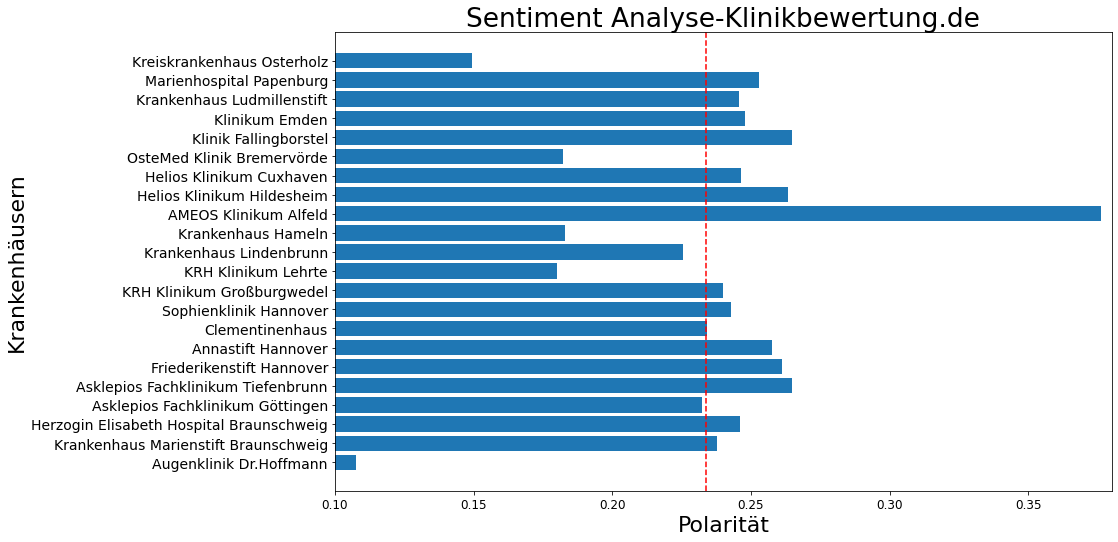

In [373]:
plt.rcParams.update({'figure.autolayout': True, 'font.size': 22})
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=14)
fig, ax = plt.subplots(figsize=(16, 8))
ax.barh(group_names, group_data)
ax.set(xlim=[0.1, 0.38], xlabel='Polarität', ylabel='Krankenhäusern',title='Sentiment Analyse-Klinikbewertung.de')
ax.axvline(group_mean, ls='--', color='r')
#df_sorted_desc= dfsentiment.sort_values('Polarität',ascending=False)

In [55]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

## WordCloud

In [80]:
#%matplotlib inline

In [374]:
german_stop_words = stopwords.words('german')

In [375]:
wordcloud = WordCloud(stopwords=german_stop_words, background_color="white",width=1920, height=1080, max_words=200).generate(reviewlist[1]) #width=1920, , height=1080

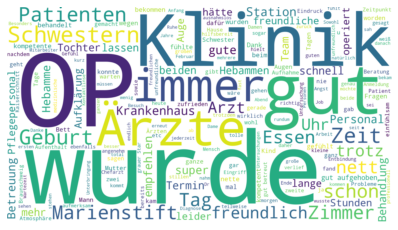

In [376]:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("img/drhoffman1.png") #, dpi=300
plt.rcParams['figure.figsize'] = [12, 8]
plt.show()

Mittels folgenden Code können wir alle WordCloud für jedes Krankenhaus bekommen and auf unserem Rechner speichern.

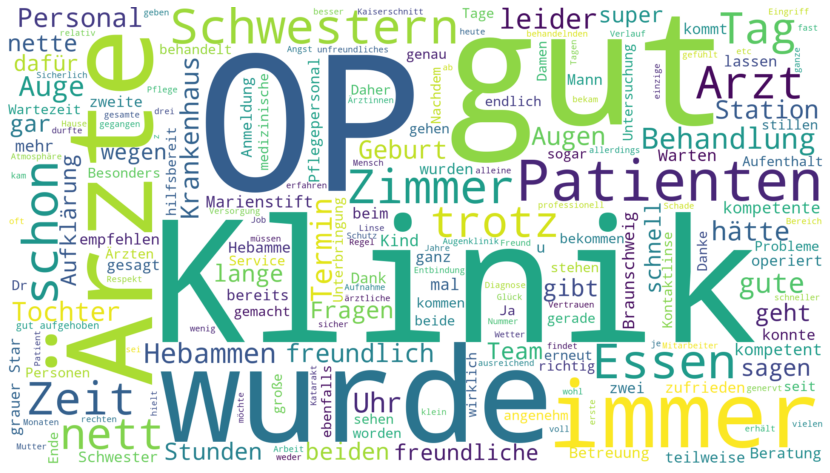

In [377]:
for f in range(len(df["Name der Klinik"].unique())):
    german_stop_words = stopwords.words('german')
    wordcloud = WordCloud(stopwords=german_stop_words, background_color="white", width=1920, max_words=200, height=1080).generate(reviewlist[f])
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.rcParams['figure.figsize'] = [18, 12]
    plt.savefig("img/"+dfsentiment["Name der Klinik"][f]+".png", dpi=300)
    #plt.show()

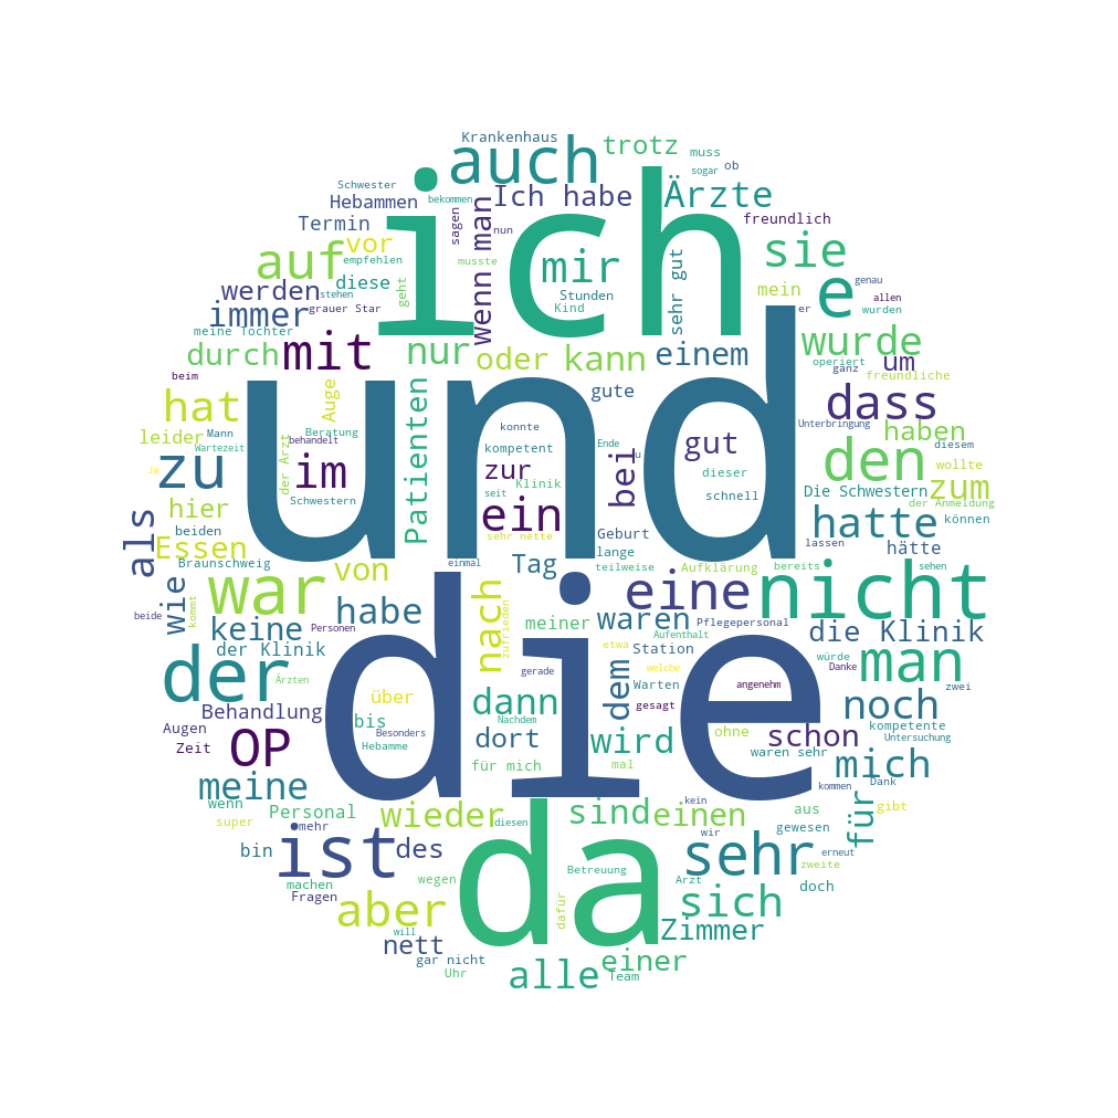

In [89]:
x, y = np.ogrid[:1000, :1000]
mask = (x - 500) ** 2 + (y - 500) ** 2 > 400 ** 2
mask = 255 * mask.astype(int)

wordcloud = WordCloud(background_color="white",width=1920, height=1080, mask=mask).generate(review)
plt.imshow(wordcloud, extent=(8, 70, 8, 70), interpolation="bilinear")
plt.axis("off")
plt.savefig('plot.png', dpi=300)
#plt.savefig("drhoffmann.png", format="png")
plt.show()

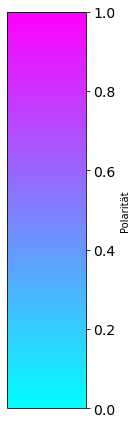

In [126]:
fig, ax = plt.subplots(figsize=(2, 6))
fig.subplots_adjust(bottom=0.5)

#cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=0, vmax=1)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=ax, orientation='vertical', label='Polarität')

In [370]:
df_sample=df.sample(frac = 0.10)
df_sample.head()

,K_ID,Name der Klinik,Titel,Datum,Fachbereich,Erfahrungsbericht,Gesamtzufriedenheit,Qualität der Beratung,Mediz. Behandlung,Verwaltung und Abläufe,Ausstattung und Gestaltung,Gesamt,Qualität,Behandlung,Verwaltung,Ausstattung
362,5,Asklepios Fachklinikum Tiefenbrunn,Die beste Zeit meines Lebens,24.07.2016,Entbindung,Kurz gesagt: Die beste Zeit meines Lebens! Ein...,sehr zufrieden,sehr zufrieden,sehr zufrieden,zufrieden,NaN,6.0,6.0,6.0,4.0,NaN
1464,13,Krankenhaus Hameln,Ausgezeichneter Gefäßchirurg,09.04.2019,Chirurgie,Die Behandlung durch Chefarzt Dr.med Tolga A S...,sehr zufrieden,sehr zufrieden,sehr zufrieden,zufrieden,NaN,6.0,6.0,6.0,4.0,NaN
1690,13,Krankenhaus Hameln,DANKE!,19.01.2015,NaN,DAS IST JETZT MAL FÄLLIG!!!!!!!Danke sagen fas...,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,6.0,6.0,6.0,6.0,6.0
2022,15,Helios Klinikum Hildesheim,Top Pflege und Betreuung Station A1,05.10.2011,Chirurgie,"Hallo, ich war in der Zeit vom 26.09. - 04.10....",sehr zufrieden,sehr zufrieden,sehr zufrieden,sehr zufrieden,weniger zufrieden,6.0,6.0,6.0,6.0,2.0
1242,10,KRH Klinikum Großburgwedel,Dreckig Unkompetent,15.05.2012,Frauen,Meine Mutter wurde 2 1/2 mon. mit einer Krebsd...,unzufrieden,unzufrieden,unzufrieden,unzufrieden,NaN,0.0,0.0,0.0,0.0,NaN


In [387]:
vectorizer = TfidfVectorizer(
    analyzer="word", max_df=0.3, min_df=10, ngram_range=(1, 2), norm="l2")
vectorizer.fit(df_sample["Erfahrungsbericht"])

TfidfVectorizer(max_df=0.3, min_df=10, ngram_range=(1, 2))

In [388]:
word_vector = pd.Series(vectorizer.vocabulary_).sample(5, random_state=1)
print(f"Unique word (ngram) vector extract:\n\n {word_vector}")

Unique word (ngram) vector extract:

 auf die           37
und sehr         439
unfreundlich     440
nur empfehlen    344
machen           295
dtype: int64


In [390]:
# Sample data - 25% of data to test set
train, test = train_test_split(df_sample, random_state=1, test_size=0.25, shuffle=True)

X_train = train["Erfahrungsbericht"]
Y_train = train["Gesamt"]
X_test = test["Erfahrungsbericht"]
Y_test = test["Gesamt"]
print(X_train.shape)
print(X_test.shape)

(213,)
(72,)


In [391]:
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)
X_train_vec.get_shape()

(213, 516)

In [392]:
# Compare original comment text with its numeric vector representation
print(f"Original sentence:\n{X_train[3:4].values}\n")
# Feature Matrix
features = pd.DataFrame(
    X_train_vec[3:4].toarray(), columns=vectorizer.get_feature_names()
)
nonempty_feat = features.loc[:, (features != 0).any(axis=0)]
print(f"Vector representation of sentence:\n {nonempty_feat}")

Original sentence:
['Hallöchen,ich war gestern 07.06.18 erst dort für eine ambulte kleine op.Morgens um 7uhr wurde ich direkt freundlich in Empfang genommen und weiter geleitet in OI ,wo mir auch gleich ein Lächeln ins Gesicht gezaubert wurde durch die freundliche Mitarbeiterin die mir gleich das Zimmer zuteilte und die sich gleich um mein Wohl sorgte.Nach kurzer Zeit ging es zur Narkose,auch dort keine Spur von Stress,im Gegenteil.Alles sehr entspannt,zauberhafte Kommunikation und kleinen smalltalk der für mich zum Wohlbefinden beitrug. Als dann alles geschafft war hatte ich genug Ruhe um wieder zurecht zu kommen,auch dort die stationsfee wieder sehr fürsorglich. Selten so ein tolles Team in einer Klinik erlebt und schon einiges gesehen.Grosses Lob für eure tolle Arbeit,macht weiter so.lg']

Vector representation of sentence:
       alles    arbeit      dann      dort     durch  durch die     einer  \
0  0.176973  0.161814  0.108533  0.269828  0.106981   0.148942  0.102662   

       

For this five word sentence, the vector of length 122618 contains mostly zeros. However, the indices representing the used words / ngrams are non empty. They include the value that TF-IDF assigned to them. In this particular case, "seid jahr" (since year) has the largest weight meaning that it is relatively frequent in our sentence while not being very common in other sentences of our dataset.

In [398]:
# models to test
classifiers = [
    LogisticRegression(solver="sag", random_state=1),
    LinearSVC(random_state=1),
    RandomForestClassifier(random_state=1),
    XGBClassifier(random_state=1),
    MLPClassifier(
        random_state=1,
        solver="adam",
        hidden_layer_sizes=(12, 12, 12),
        activation="relu",
        early_stopping=True,
        n_iter_no_change=1,
    ),
]
# get names of the objects in list (too lazy for c&p...)
names = [re.match(r"[^\(]+", name.__str__())[0] for name in classifiers]
print(f"Classifiers to test: {names}")

Classifiers to test: ['LogisticRegression', 'LinearSVC', 'RandomForestClassifier', 'XGBClassifier', 'MLPClassifier']


In [399]:
%%time
# test all classifiers and save pred. results on test data
results = {}
for name, clf in zip(names, classifiers):
    print(f"Training classifier: {name}")
    clf.fit(X_train_vec, Y_train)
    prediction = clf.predict(X_test_vec)
    report = sklearn.metrics.classification_report(Y_test, prediction)
    results[name] = report

Training classifier: LogisticRegression
Training classifier: LinearSVC
Training classifier: RandomForestClassifier


C:\Users\name\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\name\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\name\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



Training classifier: XGBClassifier
[01:54:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training classifier: MLPClassifier
Wall time: 1.38 s


C:\Users\name\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [400]:
# Prediction results
for k, v in results.items():
    print(f"Results for {k}:")
    print(f"{v}\n")

Results for LogisticRegression:
              precision    recall  f1-score   support

         0.0       0.50      0.44      0.47        18
         2.0       0.00      0.00      0.00         4
         4.0       0.00      0.00      0.00         4
         6.0       0.75      0.91      0.82        46

    accuracy                           0.69        72
   macro avg       0.31      0.34      0.32        72
weighted avg       0.60      0.69      0.64        72


Results for LinearSVC:
              precision    recall  f1-score   support

         0.0       0.58      0.78      0.67        18
         2.0       0.00      0.00      0.00         4
         4.0       0.00      0.00      0.00         4
         6.0       0.85      0.87      0.86        46

    accuracy                           0.75        72
   macro avg       0.36      0.41      0.38        72
weighted avg       0.69      0.75      0.72        72


Results for RandomForestClassifier:
              precision    recall  f1